In [1]:
#common packages we basically always need
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from time import time


In [ ]:
# again, you may find it easier to debug to first fill in the functions here, and then copy and paste them into your github classroom


def sigmoid(s):
    return None



def get_class_accuracy(X, y, theta):
    return 0



def getLossFunction(X, y, theta):
    return 0

def getGradient(X, y, theta):
    return None

def getStochGradient(X, y, theta,idx):
    return None


{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


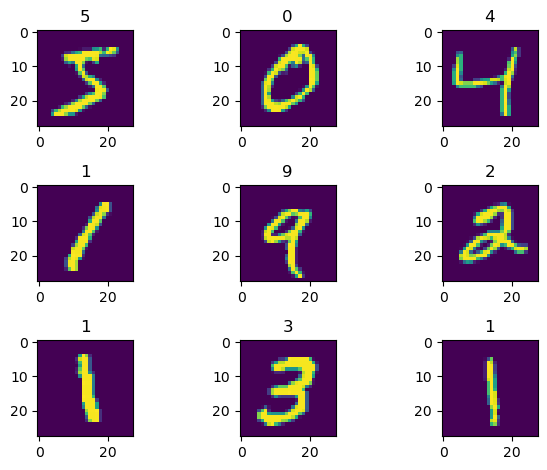

In [2]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)



Xtrain, Xtest = data['trainX'].astype(float), data['testX'].astype(float)
ytrain, ytest = data['trainY'][0], data['testY'][0]

#pull and plot some samples
for k in range(9):
    plot_data = Xtrain[k,:]
    plot_data = np.reshape(plot_data,(28,28))
    plot_label = ytrain[k]
    plt.subplot(3,3,k+1)
    plt.imshow(plot_data)
    plt.title(plot_label)
plt.tight_layout()

In [3]:
#load the MNIST dataset with binary pixel values
data = sio.loadmat('mnist.mat')
print(data)


select_train = np.logical_or(np.equal(ytrain,4),np.equal(ytrain,9))
select_test = np.logical_or(np.equal(ytest,4),np.equal(ytest,9))
Xtrain = Xtrain[select_train,:]
Xtest = Xtest[select_test,:]
ytrain = np.sign(np.equal(ytrain[select_train],4.)-.5)
ytest = np.sign(np.equal(ytest[select_test],4.)-.5)


m,n = Xtrain.shape
mt = Xtest.shape[0]

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


0 20


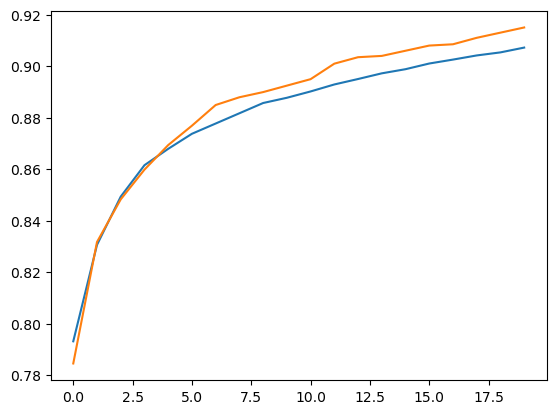

In [21]:


stepsize = 1e-6
theta = np.zeros(n)
objval = []
train_acc = []
test_acc = []

maxiter = 2000
maxiter = 20
for iter in range(maxiter):
    if iter % 100 == 0: print(iter, maxiter)
    g = getGradient(Xtrain, ytrain, theta)
    theta = theta - stepsize*g
    objval.append(getLossFunction(Xtrain, ytrain, theta))
    tr = get_class_accuracy(Xtrain, ytrain, theta)
    train_acc.append(tr)
    te = get_class_accuracy(Xtest, ytest, theta)
    test_acc.append(te)

    
plt.plot(train_acc)
plt.plot(test_acc)

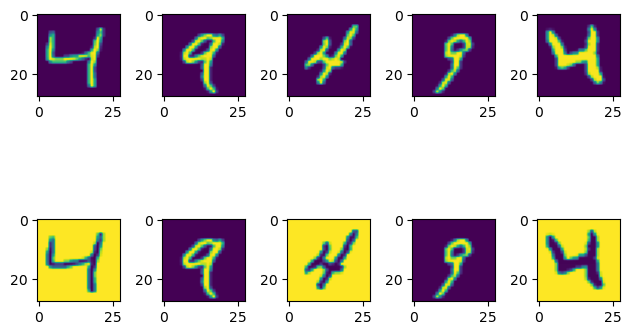

In [22]:
for k in range(5):
    plt.subplot(2,5,k+1)
    x = Xtrain[k,:]
    plt.imshow(np.reshape(x,(28,28)))

    plt.subplot(2,5,k+5+1)
    g = getStochGradient(Xtrain, ytrain, theta,[k])
    plt.imshow(np.reshape(g,(28,28)))
plt.tight_layout()

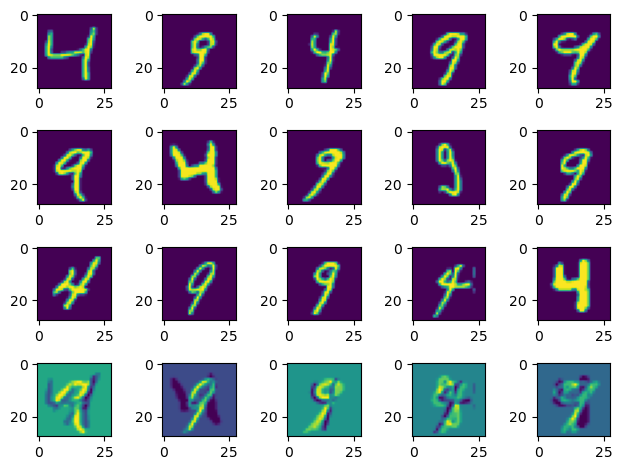

In [23]:
subsets = [[0,1,2],[3,4,5],[6,7,8],[9,10,11],[12,13,14]]

for k in range(5):
    s = subsets[k]
    for j in range(3):
        plt.subplot(4,5,k+1 + j*5)
        
        x = Xtrain[s[j],:]
        plt.imshow(np.reshape(x,(28,28)))

    plt.subplot(4,5,k+15+1)
    g = getStochGradient(Xtrain, ytrain, theta,s)
    plt.imshow(np.reshape(g,(28,28)))
plt.tight_layout()